In [4]:
import pandas as pd 
import numpy as np 
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, message="Downloading package") 

In [2]:
pip install nltk

In [7]:
df = pd.read_csv("en_coronavirus_03_04_2020_thru_03_27_2020.csv")

In [8]:
df.head(5)

,user_id,status_id,status_url,created_at,screen_name,text,source,is_quote,is_retweet,retweet_count
0,750502701457440768,1235354334923276289,https://twitter.com/RocketMan6510/status/12353...,2020-03-04T23:59:59Z,RocketMan6510,Here are the 6 confirmed #coronavirus cases in...,Twitter Web App,False,True,399
1,1694554160,1235354333602107393,https://twitter.com/mariomoraes51/status/12353...,2020-03-04T23:59:59Z,mariomoraes51,Find out how #ICT is playing a key role in hea...,Twitter for iPhone,False,True,422
2,866954221,1235354332842901506,https://twitter.com/Kath60276430/status/123535...,2020-03-04T23:59:59Z,Kath60276430,@WHO These #coronavirus case &amp; death count...,Twitter for Android,False,True,69
3,866954221,1235353059766697984,https://twitter.com/Kath60276430/status/123535...,2020-03-04T23:54:55Z,Kath60276430,"Yes, #coronavirus is a big concern, but some e...",Twitter for Android,False,True,480
4,866954221,1235354283589210112,https://twitter.com/Kath60276430/status/123535...,2020-03-04T23:59:47Z,Kath60276430,"Today's #coronavirus recap:\n\n-93,164 confirm...",Twitter for Android,False,True,1880


In [9]:
df.tail(5)

,user_id,status_id,status_url,created_at,screen_name,text,source,is_quote,is_retweet,retweet_count
305574,35769315,1243682163645530112,https://twitter.com/henrykleeKTVU/status/12436...,2020-03-27T23:31:48Z,henrykleeKTVU,Open roads as a result of the #coronavirus is ...,Twitter for iPhone,False,False,1
305575,521613339,1243682163154878464,https://twitter.com/Sneggals/status/1243682163...,2020-03-27T23:31:48Z,Sneggals,Republican Attorneys General push forward with...,Twitter Web App,False,False,0
305576,46988738,1243682163150618624,https://twitter.com/valadon2/status/1243682163...,2020-03-27T23:31:48Z,valadon2,'The essential thing was to save the greatest ...,Twitter for iPad,False,True,16
305577,1235576604488650752,1243682163117023232,https://twitter.com/bakura_yamimode/status/124...,2020-03-27T23:31:48Z,bakura_yamimode,"Although we are not sitting together, be rest ...",Twitter for Android,False,True,72
305578,1135867297,1243682161900826625,https://twitter.com/CHHammad91/status/12436821...,2020-03-27T23:31:48Z,CHHammad91,#CoronavirusPandemic #Italy has risen by 968 #...,Twitter for iPhone,False,False,0


In [10]:
print(df.shape)

(305579, 10)


In [11]:
print(df.columns)

Index(['user_id', 'status_id', 'status_url', 'created_at', 'screen_name',
       'text', 'source', 'is_quote', 'is_retweet', 'retweet_count'],
      dtype='object')


In [12]:
print(df.isnull)

<bound method DataFrame.isnull of                     user_id            status_id  \
0        750502701457440768  1235354334923276289   
1                1694554160  1235354333602107393   
2                 866954221  1235354332842901506   
3                 866954221  1235353059766697984   
4                 866954221  1235354283589210112   
...                     ...                  ...   
305574             35769315  1243682163645530112   
305575            521613339  1243682163154878464   
305576             46988738  1243682163150618624   
305577  1235576604488650752  1243682163117023232   
305578           1135867297  1243682161900826625   

                                               status_url  \
0       https://twitter.com/RocketMan6510/status/12353...   
1       https://twitter.com/mariomoraes51/status/12353...   
2       https://twitter.com/Kath60276430/status/123535...   
3       https://twitter.com/Kath60276430/status/123535...   
4       https://twitter.com/Kath6027

In [13]:
sentiments = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [10]:
print(sentiments)

0         0.156061
1         0.000000
2         0.000000
3         0.195833
4         0.293939
            ...   
305574    0.012500
305575    0.050000
305576    0.333333
305577    0.000000
305578   -0.125000
Name: text, Length: 305579, dtype: float64


In [14]:
df = df.drop(columns=['status_id', 'status_url', 'created_at', 'screen_name', 'is_quote', 'is_retweet'])

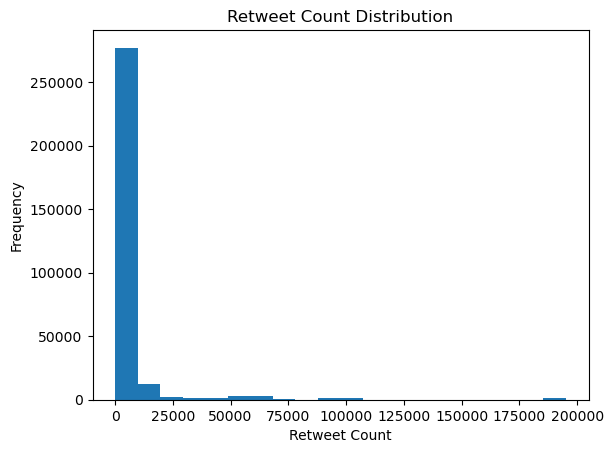

In [15]:
import matplotlib.pyplot as plt

plt.hist(df['retweet_count'], bins=20)
plt.xlabel('Retweet Count')
plt.ylabel('Frequency')
plt.title('Retweet Count Distribution')
plt.show()


In [16]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist

In [17]:
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

True

In [18]:
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return tokens

In [19]:
df['tokens'] = df['text'].apply(preprocess_text)

In [17]:
all_words = [word for tokens in df['tokens'] for word in tokens]
freq_dist = FreqDist(all_words)

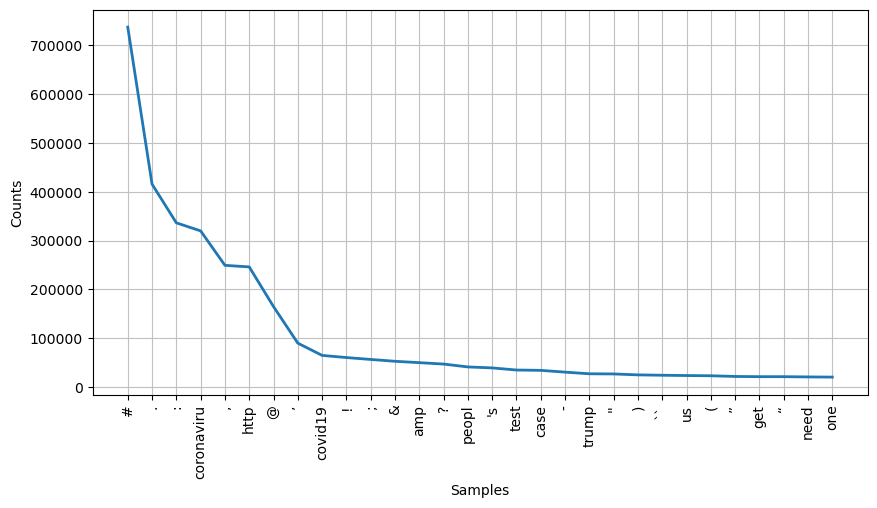

In [18]:
# Plot top N common words
plt.figure(figsize=(10, 5))
freq_dist.plot(30, cumulative=False)
plt.show()

In [19]:
thresholds = {
    'extreme_negative': -1,
    'negative': -0.5,
    'neutral': 0.5,
    'positive': 1,
    'extreme_positive': 2
}

In [20]:
def categorize_sentiment(score):
    for category, threshold in thresholds.items():
        if score <= threshold:
            return category
    return None



In [21]:
sentiment_categories = sentiments.apply(categorize_sentiment)

print(sentiment_categories)

0         neutral
1         neutral
2         neutral
3         neutral
4         neutral
           ...   
305574    neutral
305575    neutral
305576    neutral
305577    neutral
305578    neutral
Name: text, Length: 305579, dtype: object


In [22]:
df['sentiment_category'] = sentiment_categories

In [23]:
df.head()

,user_id,text,source,retweet_count,tokens,sentiment_category
0,750502701457440768,Here are the 6 confirmed #coronavirus cases in...,Twitter Web App,399,"[6, confirm, #, coronaviru, case, new, york, 1...",neutral
1,1694554160,Find out how #ICT is playing a key role in hea...,Twitter for iPhone,422,"[find, #, ict, play, key, role, healthcar, ,, ...",neutral
2,866954221,@WHO These #coronavirus case &amp; death count...,Twitter for Android,69,"[@, #, coronaviru, case, &, amp, ;, death, cou...",neutral
3,866954221,"Yes, #coronavirus is a big concern, but some e...",Twitter for Android,480,"[ye, ,, #, coronaviru, big, concern, ,, expert...",neutral
4,866954221,"Today's #coronavirus recap:\n\n-93,164 confirm...",Twitter for Android,1880,"[today, 's, #, coronaviru, recap, :, -93,164, ...",neutral


In [24]:
df["sentiment_category"].unique()

array(['neutral', 'positive', 'negative', 'extreme_negative'],
      dtype=object)

In [25]:
def sentiment_function(rating):
    if rating == "Extremely Positive":
        return "2"
    elif rating == "Positive":
        return "2"
    elif rating == "Extremely Negative":
        return "0"
    elif rating == "Negative":
        return "0"
    else:
        return "1"

In [26]:
df['sentiment analysis']=df['sentiment_category'].apply(lambda x:sentiment_function(x))

In [27]:
df['sentiment analysis'].value_counts

<bound method IndexOpsMixin.value_counts of 0         1
1         1
2         1
3         1
4         1
         ..
305574    1
305575    1
305576    1
305577    1
305578    1
Name: sentiment analysis, Length: 305579, dtype: object>

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

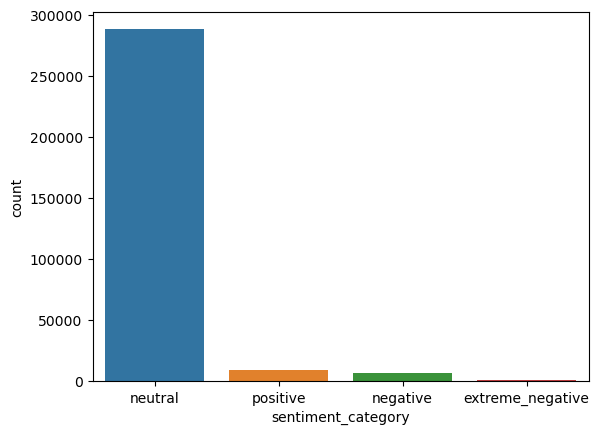

In [29]:
sns.countplot(x = 'sentiment_category', data = df)
plt.show()

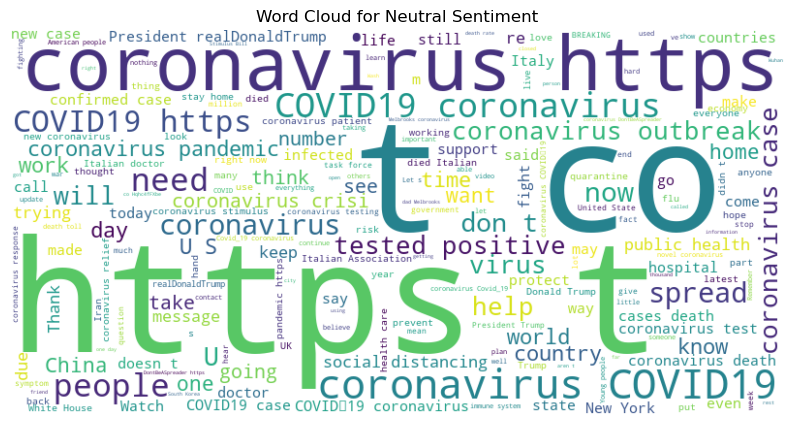

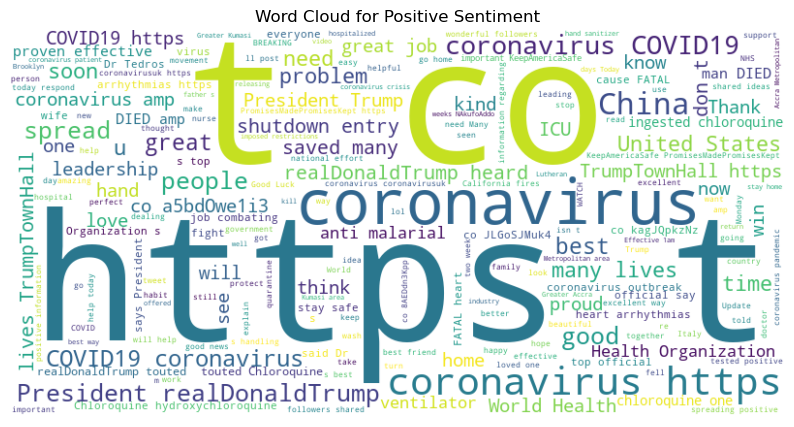

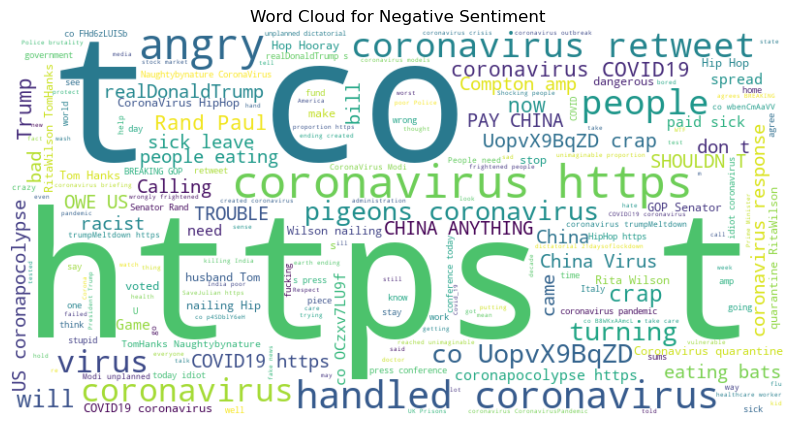

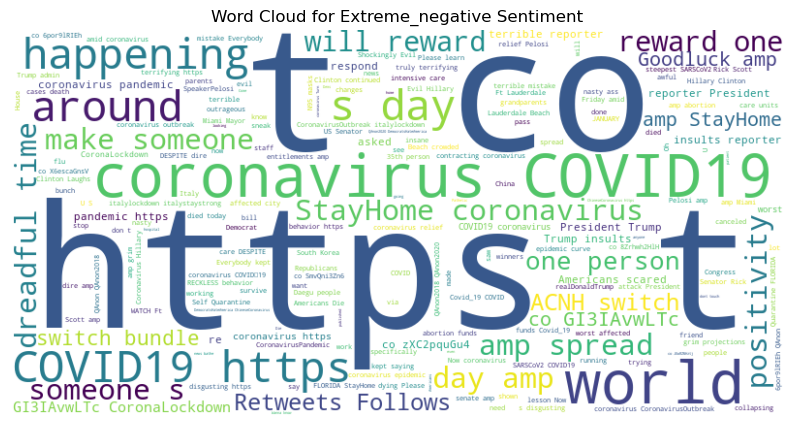

In [30]:
from wordcloud import WordCloud

# Example word clouds for each sentiment category
for sentiment_category in df['sentiment_category'].unique():
    text = ' '.join(df[df['sentiment_category'] == sentiment_category]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment_category.capitalize()} Sentiment')
    plt.axis('off')
    plt.show()

In [31]:
df['sentiment analysis'].value_counts(normalize = True)

1    1.0
Name: sentiment analysis, dtype: float64

In [32]:
import nltk
from nltk.corpus import stopwords

In [33]:
eng_stopwords = set(stopwords.words('english'))

In [34]:
import re

In [35]:
def decode(regularexpression_text):
    regularexpression_text = re.sub(r"won't", "will not", regularexpression_text)
    regularexpression_text = re.sub(r"\'m", " am", regularexpression_text)
    regularexpression_text = re.sub(r"\'ve", " have", regularexpression_text)
    regularexpression_text = re.sub(r"n\'t", " not", regularexpression_text)
    regularexpression_text = re.sub(r"\'t", " not", regularexpression_text)
    regularexpression_text = re.sub(r"\'re", " are", regularexpression_text)
    regularexpression_text = re.sub(r"\'d", " would", regularexpression_text)
    regularexpression_text = re.sub(r"\'s", " is", regularexpression_text)
    regularexpression_text = re.sub(r"\'ll", " will", regularexpression_text)
    regularexpression_text = re.sub(r"can\'t", "can not", regularexpression_text)
    return regularexpression_text

In [36]:
from tqdm import tqdm
from bs4 import BeautifulSoup

In [37]:
preprocessing_tweets = []
for lines in tqdm(df['text'].values):
    lines = re.sub(r'https?://\S+|www\.\S+', r'', lines) # removing the urls in the lines from the given text dataset
    lines = re.sub('[^A-Za-z]+', ' ', lines)
    lines = re.sub(r'<.*?>', r'', lines) # removing the html
    lines = re.sub("\S*\d\S*", "", lines).strip()
    lines = re.sub(r'\d+', '', lines).strip() # Removes the Integers, numbers
    lines = re.sub(r"\s+"," ", lines).strip() # removing the spaces that contains in the text
    lines = re.sub(r'#\w+','', lines) # removing the hashtags
    lines = re.sub(r"[^\w\s\d]","", lines) # It removes the punctuations
    lines = re.sub(r'@\w+','', lines) # It removes @mentions
    lines = BeautifulSoup(lines, 'lxml').get_text()
    lines = decode(lines)
    lines = ' '.join([e.lower() for e in lines.split() if e.lower() not in eng_stopwords])
    preprocessing_tweets.append(lines.strip())
    

100%|████████████████████████████████████████████████████████████████████████| 305579/305579 [01:46<00:00, 2859.97it/s]


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
term_frequency_vectorizer = TfidfVectorizer(min_df=5)
term_frequency_vectorizer.fit(preprocessing_tweets)

TfidfVectorizer(min_df=5)

In [40]:
print("Providing some of the sample words that are available in the corpus",term_frequency_vectorizer.get_feature_names_out()[0:500])
print('='*5)

Providing some of the sample words that are available in the corpus ['aa' 'aaaaaaand' 'aaas' 'aabb' 'aafp' 'aajtak' 'aamctoday'
 'aanawebupdates' 'aap' 'aapi' 'aapl' 'aappres' 'aaron' 'aaronhoughton'
 'aarp' 'ab' 'aba' 'abad' 'abah' 'abandon' 'abandoned' 'abandoning'
 'abandonment' 'abandons' 'abari' 'abated' 'abauman' 'abba' 'abbas'
 'abbey' 'abbot' 'abbott' 'abbottnews' 'abbracciame' 'abc' 'abcactionnews'
 'abchobart' 'abcmelbourne' 'abcnews' 'abcnewslive' 'abcpolitics' 'abcs'
 'abctv' 'abcworldnews' 'abdaniellesmith' 'abdi' 'abdicated' 'abdication'
 'abducted' 'abdulaziz' 'abdulelsayed' 'abdulmalik' 'abe' 'abeersalmancnn'
 'abeshinzo' 'abetting' 'abf' 'abhealth' 'abhi' 'abhorrent' 'abia' 'abide'
 'abided' 'abides' 'abiding' 'abilities' 'ability' 'abject' 'able' 'ableg'
 'ableism' 'abnormal' 'abnormalities' 'aboard' 'abohamzahasanat'
 'abolghasemi' 'abolish' 'abolishice' 'abolishthemonarchy' 'abomination'
 'aboriginal' 'aborted' 'abortion' 'abortionismurder' 'abortionist'
 'abortioni

In [41]:
term_frequency_inverse_document_frequency = term_frequency_vectorizer.transform(preprocessing_tweets)

In [42]:
print("Count Vector Type :",type(term_frequency_inverse_document_frequency))
print("TFIDF vectorizer shape of the text :",term_frequency_inverse_document_frequency.get_shape())
print("Unigrams and Bigrams that are available : ", term_frequency_inverse_document_frequency.get_shape()[1])

Count Vector Type : <class 'scipy.sparse._csr.csr_matrix'>
TFIDF vectorizer shape of the text : (305579, 29600)
Unigrams and Bigrams that are available :  29600


In [43]:
# Neural Network
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam